# Pytorch

In [1]:
import torch
torch.__version__

'1.13.1+cu116'

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv(r"/content/Bank_Personal_Loan_Modelling.csv")

In [4]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
data.info()
data.drop(['Age','ID','ZIP Code'],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


class0:  70.6 %


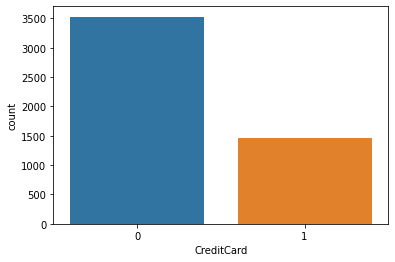

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = 'CreditCard',data = data)
print("class0: ",sum(data['CreditCard']==0)/len(data)*100,"%")

In [7]:
from sklearn.model_selection import train_test_split as tts
xtr,xtst,ytr,ytst = tts(data.drop(['CreditCard'],axis=1),data['CreditCard'],test_size=0.25)
xtr.shape,xtst.shape,ytr.shape,ytst.shape

((3750, 10), (1250, 10), (3750,), (1250,))

In [8]:
xtr = torch.tensor(xtr.values, dtype=torch.float32)
xtst = torch.tensor(xtst.values, dtype=torch.float32)
ytr = torch.tensor(ytr.values, dtype=torch.float32).reshape(-1,1)
ytst = torch.tensor(ytst.values, dtype=torch.float32).reshape(-1,1)

In [9]:
class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = torch.nn.Linear(10, 16)
        self.act1 = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(16, 8)
        self.act2 = torch.nn.ReLU()
        self.linear3 = torch.nn.Linear(8,1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.linear1(x)
        x = self.act1(x)
        x = self.linear2(x)
        x = self.act2(x)
        x = self.linear3(x)
        x = self.sigmoid(x)
        return x

In [10]:
epochs = 1000
model = Model()

train_loss_values = []
test_loss_values = []
epoch_count = []

loss_fn = torch.nn.BCELoss(weight = torch.tensor([0.8]))
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [11]:
for epoch in range(epochs):
    model.train()
    ypr = model(xtr)

    loss = loss_fn(ypr, ytr)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model.eval()
    with torch.inference_mode():
      test_pred = model(xtst)
      test_loss = loss_fn(test_pred, ytst.type(torch.float))

      if epoch % 100 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 1.3044112920761108 | MAE Test Loss: 1.1261165142059326 
Epoch: 100 | MAE Train Loss: 0.5198016166687012 | MAE Test Loss: 0.503182053565979 
Epoch: 200 | MAE Train Loss: 0.49748140573501587 | MAE Test Loss: 0.490695595741272 
Epoch: 300 | MAE Train Loss: 0.49052655696868896 | MAE Test Loss: 0.48718997836112976 
Epoch: 400 | MAE Train Loss: 0.4874402582645416 | MAE Test Loss: 0.4847366213798523 
Epoch: 500 | MAE Train Loss: 0.4850229024887085 | MAE Test Loss: 0.4824276864528656 
Epoch: 600 | MAE Train Loss: 0.48058024048805237 | MAE Test Loss: 0.4773431122303009 
Epoch: 700 | MAE Train Loss: 0.47286170721054077 | MAE Test Loss: 0.47172290086746216 
Epoch: 800 | MAE Train Loss: 0.46526840329170227 | MAE Test Loss: 0.46427202224731445 
Epoch: 900 | MAE Train Loss: 0.45820727944374084 | MAE Test Loss: 0.4572843313217163 


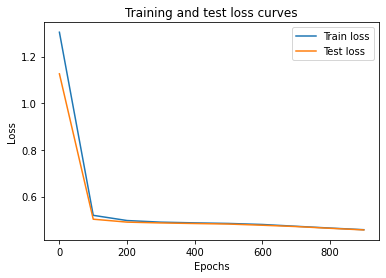

In [12]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [13]:
with torch.inference_mode():
      test_pred = model(xtst)
ans1 = (test_pred>0.5).float()
loss_fn(ytst,test_pred)

tensor(31.1940)

In [15]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(ans1,ytst)

array([[887, 305],
       [  8,  50]])

In [18]:
print(classification_report(ans1,ytst))

              precision    recall  f1-score   support

         0.0       0.99      0.74      0.85      1192
         1.0       0.14      0.86      0.24        58

    accuracy                           0.75      1250
   macro avg       0.57      0.80      0.55      1250
weighted avg       0.95      0.75      0.82      1250



# Keras

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [46]:
model = Sequential()
model.add(Dense(16, input_shape=(10,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 16)                176       
                                                                 
 dense_64 (Dense)            (None, 8)                 136       
                                                                 
 dense_65 (Dense)            (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [47]:
from sklearn.model_selection import train_test_split as tts
xtr,xtst,ytr,ytst = tts(data.drop(['CreditCard'],axis=1),data['CreditCard'],test_size=0.25)

In [48]:
model.fit(xtr,ytr,epochs=100)

Epoch 1/100
118/118 [==============================] - 1s 2ms/step - loss: 2.6110 - accuracy: 0.6416
Epoch 2/100
118/118 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.6683
Epoch 3/100
118/118 [==============================] - 0s 2ms/step - loss: 0.6410 - accuracy: 0.6813
Epoch 4/100
118/118 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.6877
Epoch 5/100
118/118 [==============================] - 0s 2ms/step - loss: 0.6257 - accuracy: 0.7021
Epoch 6/100
118/118 [==============================] - 0s 2ms/step - loss: 0.6201 - accuracy: 0.7024
Epoch 7/100
118/118 [==============================] - 0s 2ms/step - loss: 0.6175 - accuracy: 0.7008
Epoch 8/100
118/118 [==============================] - 0s 2ms/step - loss: 0.6183 - accuracy: 0.7035
Epoch 9/100
118/118 [==============================] - 0s 2ms/step - loss: 0.6047 - accuracy: 0.7139
Epoch 10/100
118/118 [==============================] - 0s 2ms/step - loss: 0.6019 - accura

In [49]:
ans = (model.predict(xtst)>0.5).astype(int)

40/40 [==============================] - 0s 1ms/step


In [50]:
confusion_matrix(ans,ytst)

array([[857, 330],
       [ 10,  53]])

In [51]:
print(classification_report(ans,ytst))

              precision    recall  f1-score   support

           0       0.99      0.72      0.83      1187
           1       0.14      0.84      0.24        63

    accuracy                           0.73      1250
   macro avg       0.56      0.78      0.54      1250
weighted avg       0.95      0.73      0.80      1250

